<a href="https://colab.research.google.com/github/xxchanjotxx/Crypto-Outliers/blob/main/Crypto_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import calendar
from scipy.stats import linregress

%matplotlib inline

In [7]:
df = pd.read_csv("btc-eth-prices-outliers.csv", index_col = 0, parse_dates=True)
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bitcoin  365 non-null    float64
 1   Ether    362 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [9]:
df.describe()

,Bitcoin,Ether
count,365.000000,362.000000
mean,6996.004022,469.247072
std,10186.586168,636.820105
min,1099.169125,42.310000
25%,2585.349186,238.525000
50%,4594.987850,308.825000
75%,9182.843333,657.502500
max,143805.816667,8648.300000


<Axes: xlabel='Timestamp'>

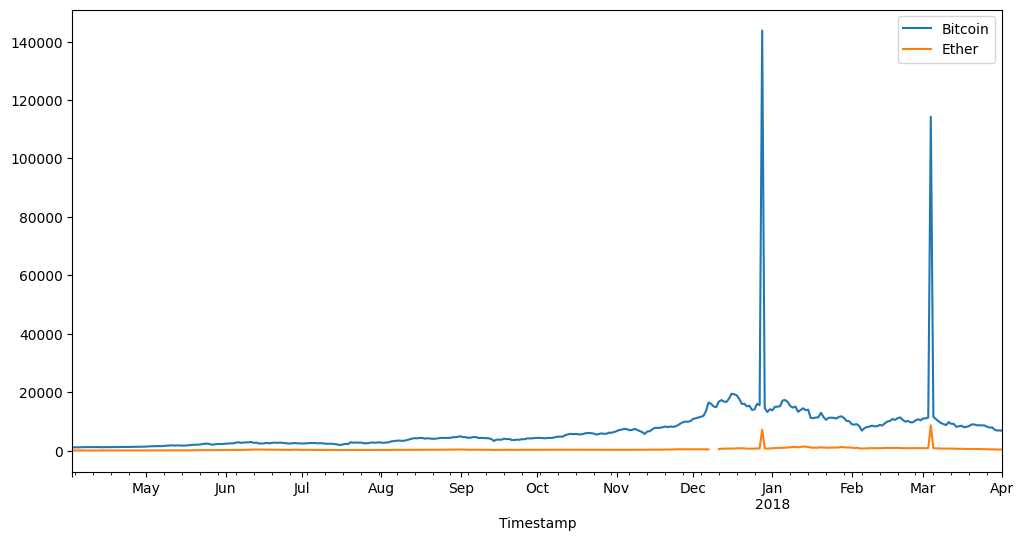

In [10]:
df.plot(figsize = (12,6))

<Axes: xlabel='Timestamp'>

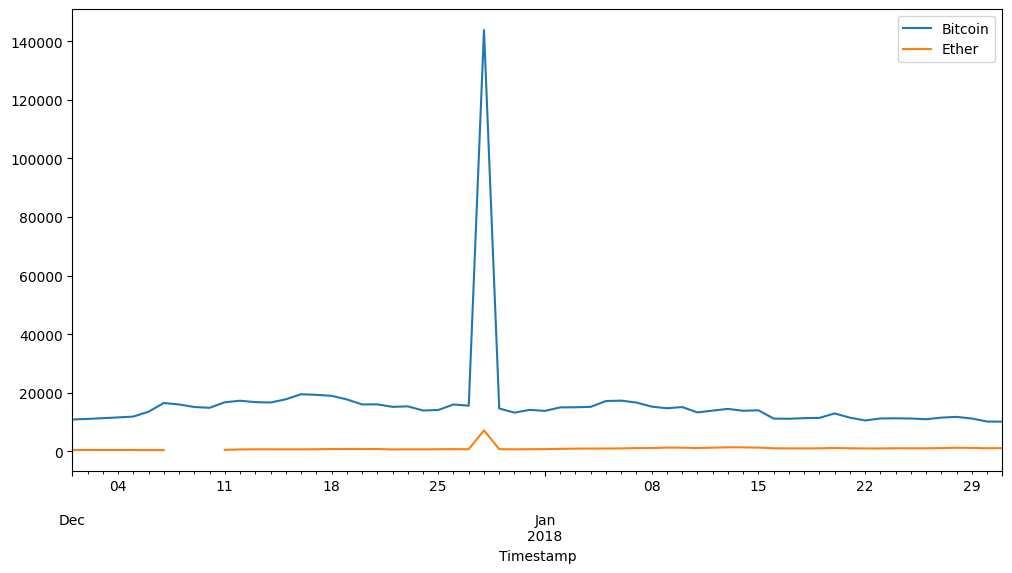

In [11]:
df.loc['2017-12':'2018-01'].plot(figsize=(12,6))

<Axes: xlabel='Timestamp'>

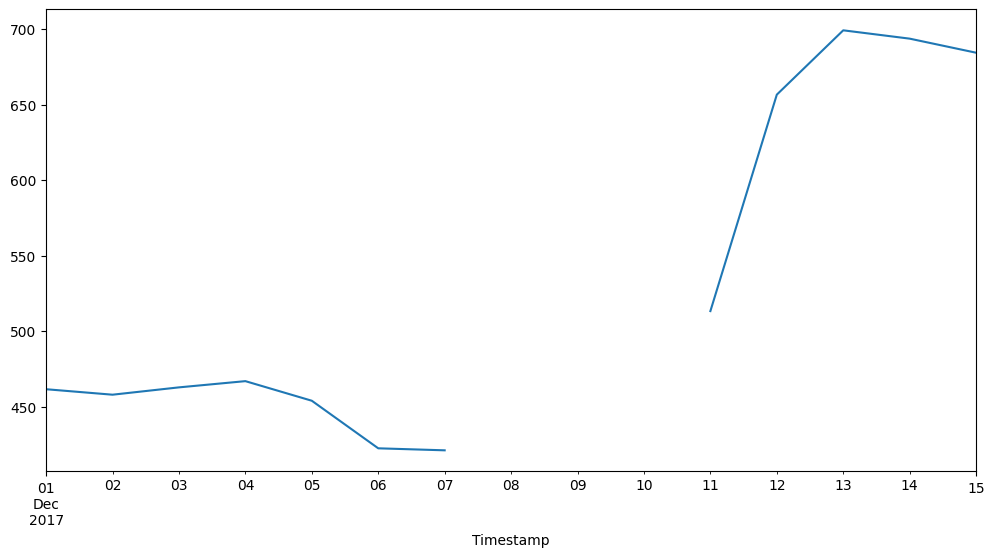

In [12]:
df.loc['2017-12':'2017-12-15', 'Ether'].plot(figsize=(12,6))

In [13]:
df_na = df.loc['2017-12': '2017-12-15']
df.isna().sum()

Bitcoin    0
Ether      3
dtype: int64

In [14]:
df_na1 = df[df['Ether'].isna()]

In [15]:
df_na.fillna(method = 'bfill', inplace = True)

<ipython-input-15-643bd56c3bec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na.fillna(method = 'bfill', inplace = True)


<Axes: xlabel='Timestamp'>

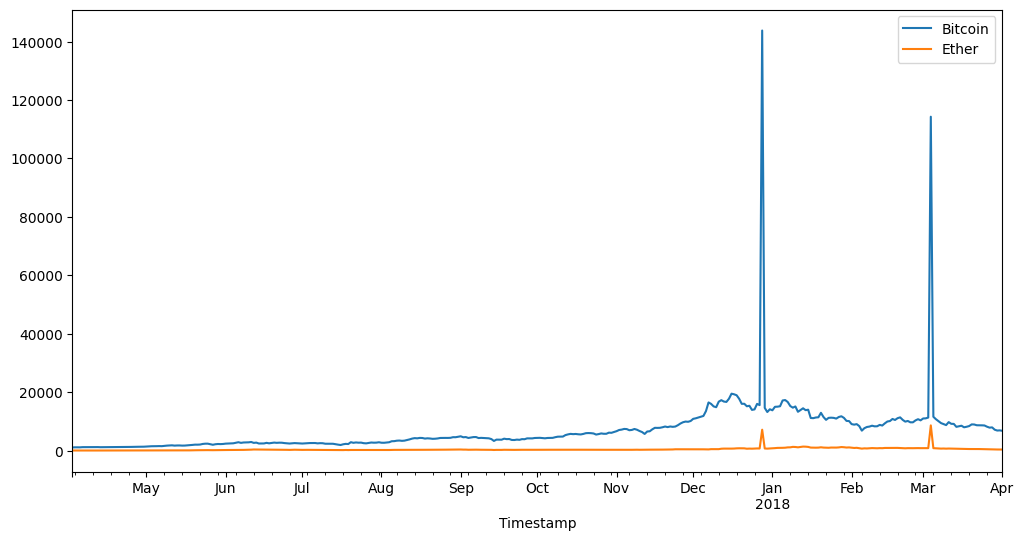

In [16]:
df.plot(figsize = (12,6))

<Axes: xlabel='Timestamp'>

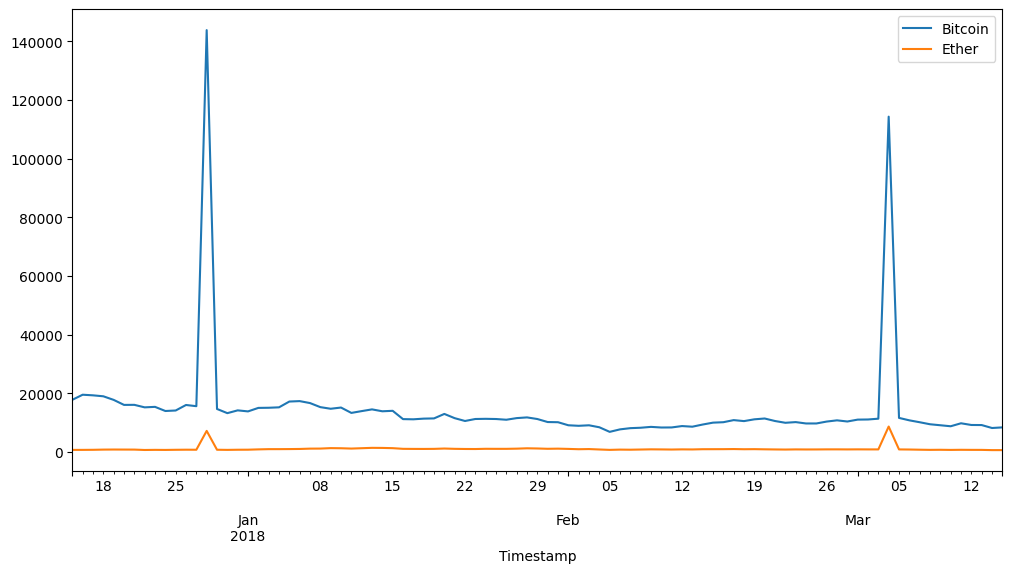

In [17]:
df.loc['2017-12-15': '2018-03-15'].plot(figsize = (12,6))

<Axes: xlabel='Timestamp'>

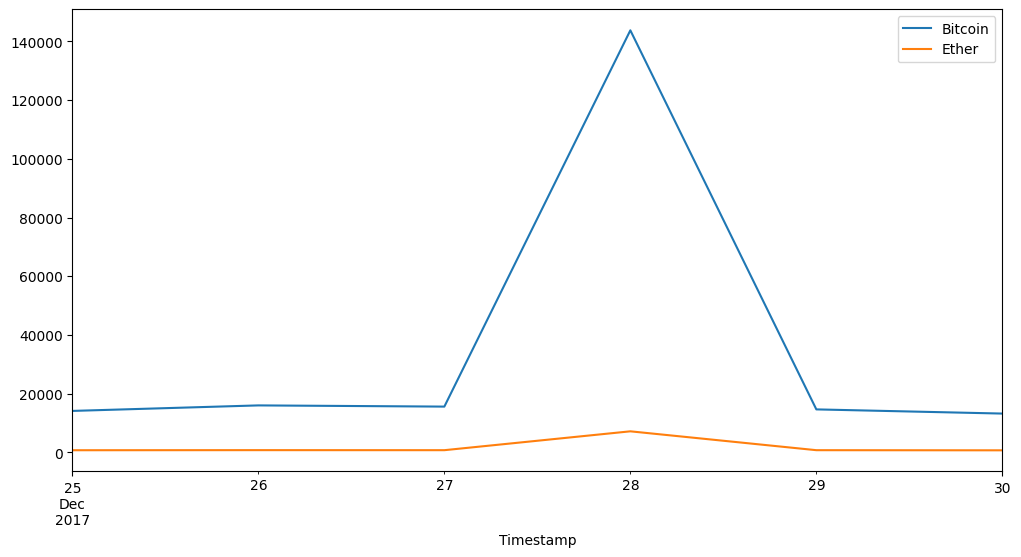

In [18]:
df.loc['2017-12-25': '2017-12-30'].plot(figsize = (12,6))

**The irregular dates are: 2017-12-28 and 2018-03-04**


In [19]:
df.loc['2017-12-25':'2018-01-01']

,Bitcoin,Ether
Timestamp,,
2017-12-25,14119.028333,723.14
2017-12-26,15999.048333,753.40
2017-12-27,15589.321667,739.94
2017-12-28,143805.816667,7166.90
2017-12-29,14640.140000,739.60
2017-12-30,13215.574000,692.99
2017-12-31,14165.575000,741.13
2018-01-01,13812.186667,756.20


In [20]:
df.loc['2018-02-26':'2018-03-7']

,Bitcoin,Ether
Timestamp,,
2018-02-26,10348.603333,867.62
2018-02-27,10763.883333,871.58
2018-02-28,10370.165000,851.50
2018-03-01,11009.381667,869.87
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-04,114301.816667,8648.30
2018-03-05,11595.540000,849.42
2018-03-06,10763.198333,815.69


In [21]:
df_clean = df.drop(['2017-12-28', '2018-03-04'])

<Axes: xlabel='Timestamp'>

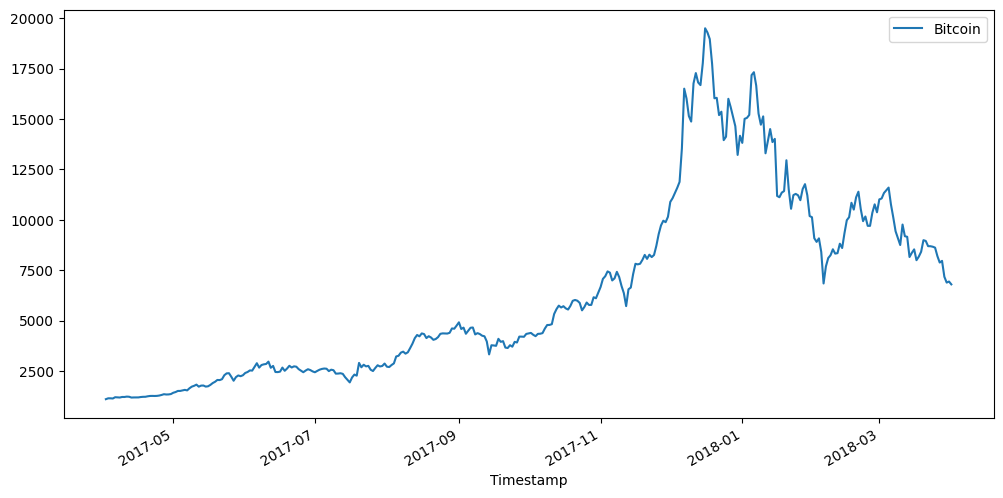

In [22]:
df_clean.plot(y = 'Bitcoin',figsize = (12,6))